# *Lab #2*
This lab will be focused on using convolution. Convolution can be used to calculate the probability of a sum or average.

In [1]:
## Importing Libraries 
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

## Problem 1

- We are looking for gamma-ray sources. 

- However there is a background of cosmic-rays. The background of cosmic-rays creates a discrete noise signal that follows a Poisson distribuiton. 

- To detect our gamma-ray source, we need to find what the probability is that the cosmic-ray background will give a measurement as a signal-like, or more signal-like than the measurement we recieved.

- The average daily cosmic-ray background noise is a number X

- the average daily number of gamma-rays (desired signal) emitted by a source is Y 


The **Poission Distribution** describes the probability of a number of events occuring in a fixed time interval with a known constant mean rate. Each event is independent of the time since the last event. 


**Poisson Probability Mass Function (PMF)**
This is a helpful distribution for looking at how many times an event occurs within a time interval.

$$f(k;\lambda )=\Pr(X=k)={\frac {\lambda ^{k}e^{-\lambda }}{k!}}$$

- k = discrete random variable, the number of occurances
- k! = factorial of k
- $\lambda$ = the expected value of k = variance

Note again that with a discrete random variable events occur independently. 

### A) *Show how the probability distribution of the background changes as you integrate (sum) for more days.*

We will set the daily average number of cosmic-ray backgorund noise equal to 3. This is the mean value for the number of cosmic-ray background measurements.

Next we set the daily average number of gamma-ray desired signal measurements equal to 6.

In [14]:
#---- PROBLEM SET UP ----

#daily average cosmic-ray background noise
cosmicRay_dayAvg = 3;

#poisson distribution cosmic-ray background noise data
data_cosmicRay = stats.poisson(cosmicRay_dayAvg);

#discrete random variable, number of occurances of cosmic-rays 
k_cosmicRays = np.arange(0,40);

#pmf of the cosmic ray background, taking a discrete variable 

#pmf of cosmic-ray background
pmf_day1 = data_cosmicRay.pmf(k_cosmicRays);

Below is a funciton that allows you to easily calculate the integrated summed pmf distribution over multiple days. 

In [15]:
#This function takes a pmf distribution, and an integer number of days.
#It outputs the pmf sum over multiple days

def pmf_laterDaySum(pmf_day1, days):
    
    pmf_sum = pmf_day1;
    
    for i in range(days-1):
        pmf_sum = np.convolve(pmf_sum, pmf_day1)
        
    return pmf_sum

Next we will create a series of plots showing the how the probability distribution of the background data changes over time as we integrate over 1 days, 5 days, and 10 days.

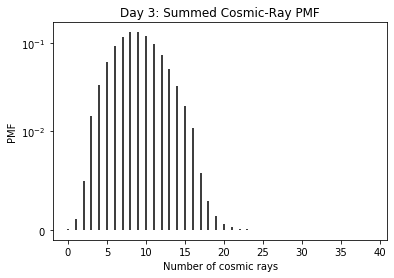

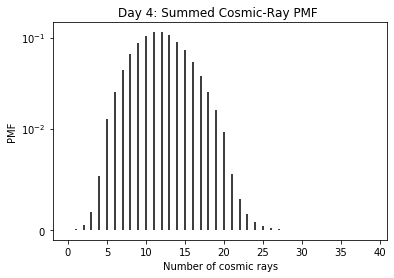

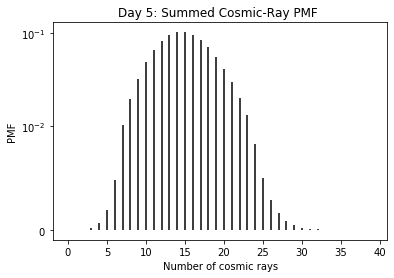

In [16]:
#---- PLOTS ----

#-----PLOT 1: DAY 3------
days = 3
#calculate integrated sum
pmf_sum_day3 = pmf_laterDaySum(pmf_day1, days)

#plot
fig, ax1 = plt.subplots(1,1)
ax1.vlines(k_cosmicRays, 0, pmf_sum_day3)

ax1.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
#Setting plot title and lables
ax1.set_xlabel('Number of cosmic rays', size = 10)
ax1.set_ylabel('PMF', size = 10)
ax1.set_title('Day 3: Summed Cosmic-Ray PMF')
plt.show()


#-----PLOT 2: DAY 4------
days = 4

pmf_sum_day4 = pmf_laterDaySum(pmf_day1, days)

#plot
fig, ax1 = plt.subplots(1,1)

ax1.vlines(k_cosmicRays, 0, pmf_sum_day4)

#Style plot
ax1.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
ax1.set_xlabel('Number of cosmic rays', size = 10)
ax1.set_ylabel('PMF', size = 10)
ax1.set_title('Day 4: Summed Cosmic-Ray PMF ')
plt.show()


#-----PLOT 2: DAY 5------
days = 5
pmf_sum_day5 = pmf_laterDaySum(pmf_day1, days)

fig, ax1 = plt.subplots(1,1)

ax1.vlines(k_cosmicRays, 0, pmf_sum_day5)

#Style plot
ax1.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
ax1.set_xlabel('Number of cosmic rays', size = 10)
ax1.set_ylabel('PMF', size = 10)
ax1.set_title('Day 5: Summed Cosmic-Ray PMF ')
plt.show()

The series of plots above shows how the probability distribution changes as you integrate (sum) for more days.

### B) *Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.*

From the equation below, we see that when summing a poisson distribution although the expected value ($\lambda$) changes, the distribution remains a poisson distribution:
$${\displaystyle \sum _{i=1}^{n}\mathrm {Poisson} (\lambda _{i})\sim \mathrm {Poisson} \left(\sum _{i=1}^{n}\lambda _{i}\right)\qquad \lambda _{i}>0}$$

Looking at the *Day 5: Summed Cosmic-Ray PMF* plot above, we see it is visually congruent with the equation above. As time goes on and the number of days increases, we can see in the series of plots above that the distribution follows a Poisson curve with it's slightly extended tail on the right. The expected value ($\lambda$) of the Poisson distribution increases as the number of poisson distributions you are summing over increases. This shifts the distribution to the right. Therefore after 5 days, the summed probability distribution is still a Poisson distribution. 

### C) *Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theoem.*

First we create an averaged probability distribution function

In [17]:
#This function takes a pmf distribution, and an integer number of days.
#It outputs the pmf average over multiple days as the first return value,
#and outputs the re-scaled K (x axis) as the second return value

def pmf_laterDayAvg_andK(pmf_day1, days):
    
    pmf_avg = pmf_day1;
    
    for i in range(days-1):
        pmf_avg = np.convolve(pmf_avg, pmf_day1)
        
    k_cosmicRays = np.arange(len(pmf_avg)) / days;
        
    return pmf_avg, k_cosmicRays;

Next we make a series of multiple plots over different time intervals

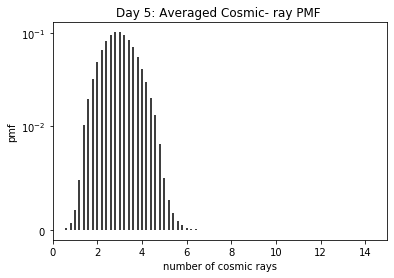

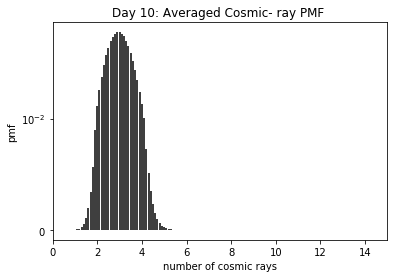

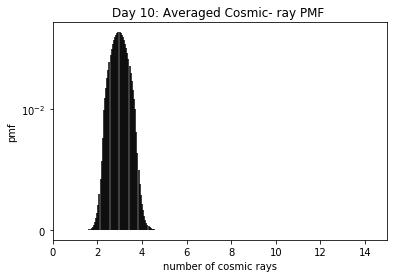

In [18]:
#---- PLOTS ----

#-----PLOT 1: DAY 5------
days = 5;

pmf_avgDay5Params = pmf_laterDayAvg_andK(pmf_day1, days);

pmf_avgDay5 = pmf_avgDay5Params[0];

k5 = pmf_avgDay5Params[1];

#plots
fig, ax1 = plt.subplots(1,1)
ax1.vlines(k5, 0, pmf_avgDay5)

ax1.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
ax1.set_xlim(0,15);

#Setting plot title and lables
ax1.set_xlabel('number of cosmic rays', size = 10)
ax1.set_ylabel('pmf', size = 10)
ax1.set_title('Day 5: Averaged Cosmic- ray PMF ')
plt.show()


#-----PLOT 2: DAY 10------
days = 10;

pmf_avgDay10Params = pmf_laterDayAvg_andK(pmf_day1, days);

pmf_avgDay10 = pmf_avgDay10Params[0];

k10 = pmf_avgDay10Params[1];

#plots
fig, ax1 = plt.subplots(1,1)
ax1.vlines(k10, 0, pmf_avgDay10)

ax1.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
ax1.set_xlim(0,15);

#Setting plot title and lables
ax1.set_xlabel('number of cosmic rays', size = 10)
ax1.set_ylabel('pmf', size = 10)
ax1.set_title('Day 10: Averaged Cosmic- ray PMF ')
plt.show()


#-----PLOT 3: DAY 20------
days = 20;

pmf_avgDay20Params = pmf_laterDayAvg_andK(pmf_day1, days);

pmf_avgDay20 = pmf_avgDay20Params[0];

k20 = pmf_avgDay20Params[1];

#plots
fig, ax1 = plt.subplots(1,1)
ax1.vlines(k20, 0, pmf_avgDay20)

ax1.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
ax1.set_xlim(0,15);

#Setting plot title and lables
ax1.set_xlabel('number of cosmic rays', size = 10)
ax1.set_ylabel('pmf', size = 10)
ax1.set_title('Day 10: Averaged Cosmic- ray PMF ')
plt.show()


The **Central Limit Theorem** states: when independent random variables are added, their properly normalized sum tends toward a normal distribution. No matter what form the population distribution is, the sampling distribution tends to a Gaussian. 

As we can see in the series of plots above, increasing the number of days  averaged causes the the spread of the distribution to shrink, and it's shape looks more like a normal distribution around the mean expected value. 

Because we are calculating the sample average, we need to re-scale our discrete random variable X (which in our case is K):
$${\displaystyle {\bar {X}}_{n}:={\frac {X_{1}+\cdots +X_{n}}{n}}}$$

In the equation above **n** is the number of times averaged. In our case the number of days averaged.

**In relationship to part B)**, here we have shown that the Poisson distribution is conserved for sums of the Poisson probability distribution, but not for averages of the probabiity distribution. 

Also note how by summing an increasing number of poisson probability distributions distributions over time the mean expected value increased and moved the distribution to the right. However when averaging an increaseing number of poisson probability distributions overtime, because we are averageing and re-scaling the discrete random variable, the mean expected value stays in the same place.

### D) *Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation. [In reality the number of gamma-rays seen from a source will also fluctuate, but we're going to ignore that complication for a couple of labs.]*

Chosen values:
- Days = $N = 80$

The average daily number of gamma rays emitted is: Y = 6. 

The total number of gamma rays observe over over **N** number of days is: 
- Gamma rays = $Y*N = 6*80 = 480$


After 60 days, we observe a total of 480 gamma rays. 
1. What is the probability that the cosmic-ray background signal looks like a value of 480 or even more signal like than the gamma rays observed? 
2. What is the 'sigma' value of this observation?

In [118]:
#days is our N value 
days = 80

#Daily average cosmic rays
X = 3

#Daily average gamma rays
Y = 6

#creates an array of numbers gamma rays observed
total_gammaRays_obs = np.arange((Y*days))

#The mean value of cosmic-rays = number of days*average daily Cosmic Ray value
cosmicRay_mean = X*days

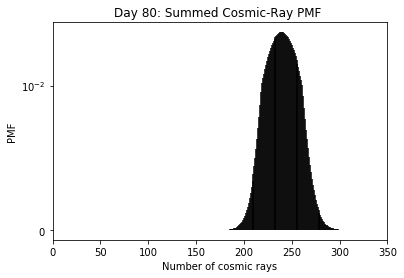

80 day cosmic ray mean =  240


In [119]:
#-----Plot: Day 80 sum of PMF------
k_cosmicRays = np.arange(0,40*60);

pmf_sum_day80 = pmf_laterDaySum(pmf_day1, days)

fig, ax1 = plt.subplots(1,1)

ax1.vlines(k_cosmicRays, 0, pmf_sum_day80)

#Style plot
ax1.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
plt.xlim(0,350)
ax1.set_xlabel('Number of cosmic rays', size = 10)
ax1.set_ylabel('PMF', size = 10)
ax1.set_title('Day 80: Summed Cosmic-Ray PMF ')
plt.show()

print('80 day cosmic ray mean = ', cosmicRay_mean)

When looking for the probability that a random variable is above a specific threshold, we need to use the **complementary cumulative distribution function** defined as one minus the CDF:

$$F_{X}(x)=\int _{-\infty }^{x}f_{X}(t)\,dt$$

$${\displaystyle {\bar {F}}_{X}(x)=\operatorname {P} (X>x)=1-F_{X}(x).}$$

Once we have the probability value, we plug this value into the **Percent Point function** to find our sigma value.

In [120]:
# Probability that cosmic ray background looks as or more signal like than 
#the gamma rays observed 

cosmicRay_Prob = 1 - stats.poisson.cdf(360, mu=cosmicRay_mean)
print('probability cosmic ray background signal = ', cosmicRay_Prob)

#Plugging the probability into ppf function to find sigma
#Need to do do (1-prob) because it's calculating the inverse of the cdf. 
sigma = stats.norm.ppf(1-cosmicRay_Prob)
print('sigma = ', sigma)

probability cosmic ray background signal =  2.1660451210436804e-13
sigma =  7.244758935588846


With a $7.2\sigma$ value for the cosmic ray background data, it is highly likely that the signal was caused by the background signal.

## Problem 2

Choose a Rayleigh distribution

### A) *Show how the distribution changes as you average over more observing intervals.*

In [158]:
#---- PROBLEM SET UP ----

#daily average cosmic-ray background noise
cosmicRay_dayAvg = 3;

#poisson distribution cosmic-ray background noise data
data_cosmicRay = stats.rayleigh(cosmicRay_dayAvg);

#discrete random variable, number of occurances of cosmic-rays 
k_cosmicRays = np.arange(0,100);

#pmf of the cosmic ray background, taking a discrete variable 

#pmf of cosmic-ray background
pdf_day1 = data_cosmicRay.pdf(k_cosmicRays);

In [159]:
#This function takes a pdf distribution, and an integer number of days.
#It outputs the pdf average over multiple days as the first return value,
#and outputs the re-scaled K (x axis) as the second return value

def pdf_laterDayAvg_andK(pdf_day1, days):
    
    pdf_avg = pdf_day1;
    
    for i in range(days-1):
        pdf_avg = np.convolve(pdf_avg, pdf_day1)
        
    k_cosmicRays = np.arange(len(pdf_avg)) / days;
        
    return pdf_avg, k_cosmicRays;

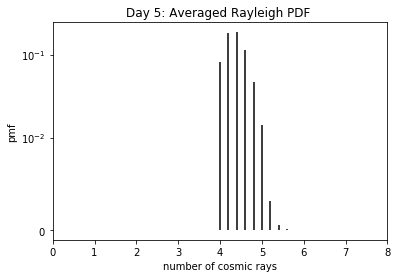

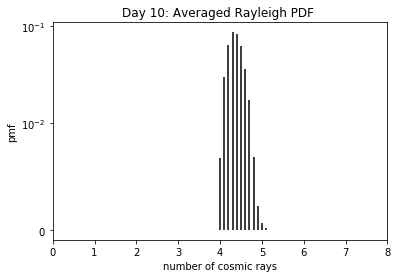

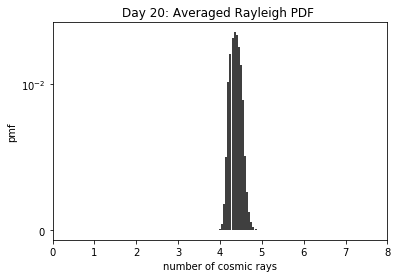

In [161]:
#---- PLOTS ----

#-----PLOT 1: DAY 5------
days = 5;

pdf_avgDay5Params = pdf_laterDayAvg_andK(pdf_day1, days);

pdf_avgDay5 = pdf_avgDay5Params[0];

k5 = pdf_avgDay5Params[1];

#plots
fig, ax1 = plt.subplots(1,1)
ax1.vlines(k5, 0, pdf_avgDay5)

ax1.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
ax1.set_xlim(0,8);

#Setting plot title and lables
ax1.set_xlabel('number of cosmic rays', size = 10)
ax1.set_ylabel('pmf', size = 10)
ax1.set_title('Day 5: Averaged Rayleigh PDF ')
plt.show()


# #-----PLOT 2: DAY 10------
days = 10;

pdf_avgDay10Params = pdf_laterDayAvg_andK(pdf_day1, days);

pdf_avgDay10 = pdf_avgDay10Params[0];

k5 = pdf_avgDay10Params[1];

#plots
fig, ax1 = plt.subplots(1,1)
ax1.vlines(k5, 0, pdf_avgDay10)

ax1.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
ax1.set_xlim(0,8);

#Setting plot title and lables
ax1.set_xlabel('number of cosmic rays', size = 10)
ax1.set_ylabel('pmf', size = 10)
ax1.set_title('Day 10: Averaged Rayleigh PDF ')
plt.show()


# #-----PLOT 3: DAY 20------
days = 20;
pdf_avgDay20Params = pdf_laterDayAvg_andK(pdf_day1, days);

pdf_avgDay20 = pdf_avgDay20Params[0];

k5 = pdf_avgDay20Params[1];

#plots
fig, ax1 = plt.subplots(1,1)
ax1.vlines(k5, 0, pdf_avgDay20)

ax1.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
ax1.set_xlim(0,8);

#Setting plot title and lables
ax1.set_xlabel('number of cosmic rays', size = 10)
ax1.set_ylabel('pmf', size = 10)
ax1.set_title('Day 20: Averaged Rayleigh PDF ')
plt.show()


The graphs above show how the Rayleigh distribution changes over time.

### B) *Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?*

The mean of the function shifts to thr right over time, making the distribution slowly approach a gaussian bell curve shape, with an even amount of data points on the right an . You can see that after about 10 days it looks like it is approaching a gaussian distribution. By twenty days it definitely appears gaussian. 

## Problem 3
- We are using an optical telescope with a thermal noise background from the CCD (dark current, particularly an issue with older CCDs and/or infra-red CCDs). 
- the background appears as a zero-mean Gaussian with constant width over the image.

### Version 1
- you can measure the width of the background Gaussian distribution X
- see a signal of strength Y
- Calculate the significance of your detection. Can you claim a discovery (traditionally 5-sigma or more)?
